# Final project

## preamble

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import os

import finalProject as fp


%reload_ext autoreload
%autoreload 2

## Game Init

time: 0
goal reward: 0
package values: [50, 50, 50]


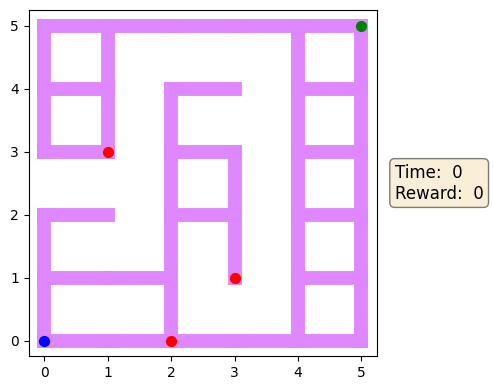

In [181]:
game = fp.Game(size=6,
    goalValue=0,
    packageValue=50,
    nPackages=3,
    timePenalty=5,
    invalidMovePenalty=10
)
print(f"time: {game.time}")
print(f"goal reward: {game.goal.value}")
print(f"package values: {[game.packages[id].value for id in range(len(game.packages))]}")
fig, axes = game.plot()
plt.show()

## Solve

In [182]:
start = time.time()
policy, valueFunction = fp.optimalPolicyGet(game, gamma=0.999)
end = time.time()
print(f"time taken: {end-start:.4f}")

time taken: 98.2656


In [183]:
# necessary directories are created
outputDir = f"frames"
os.system(f'mkdir -p anims')
os.system(f'mkdir {outputDir}')

# a copy of the game is created
auxGame = game.copy()
tickId = 0
fig, axes = auxGame.plot()
plt.savefig(f"{outputDir}/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
plt.close()
while not auxGame.walker.goalReached and tickId < game.maze.size**2:
    tickId+=1
    # the walker is moved according to policy
    auxGame.moveWalker(policy[fp.stateId(auxGame)])
    # the game plot is created and saved
    fig, axes = auxGame.plot()
    plt.savefig(f"{outputDir}/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()
    # some logs to know something is happening
    print(f'\r{tickId}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

# ffmpeg is used to create the animation
mkAnimSh = f'ffmpeg -framerate 3 -i {outputDir}/%d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -loglevel quiet anims/$(date +%m%d%H%M%S).mp4'
os.system(mkAnimSh)

# the directory with the frames is erased
os.system(f'rm -r {outputDir}')

0